In [1]:
import pandas as pd

df = pd.read_csv("C:\\Users\\lclai\\Desktop\\results_dementia.csv")
df.head(3)

,TYPE,NLP,ML,MEAN AUC CV,STD AUC,PARAMETERS,AUC TEST
0,SPEECH,TFIDF,RF,0.9180,0.0266,"{'model__max_depth': None, 'model__max_feature...",0.8960
1,SPEECH,BERT,RF,0.7798,0.0772,"{'model__max_depth': None, 'model__max_featur...",0.7967
2,SPEECH,W2V,RF,0.8806,0.0381,"{'model__max_depth': 10, 'model__max_features'...",0.8832


In [2]:
df = df.dropna()

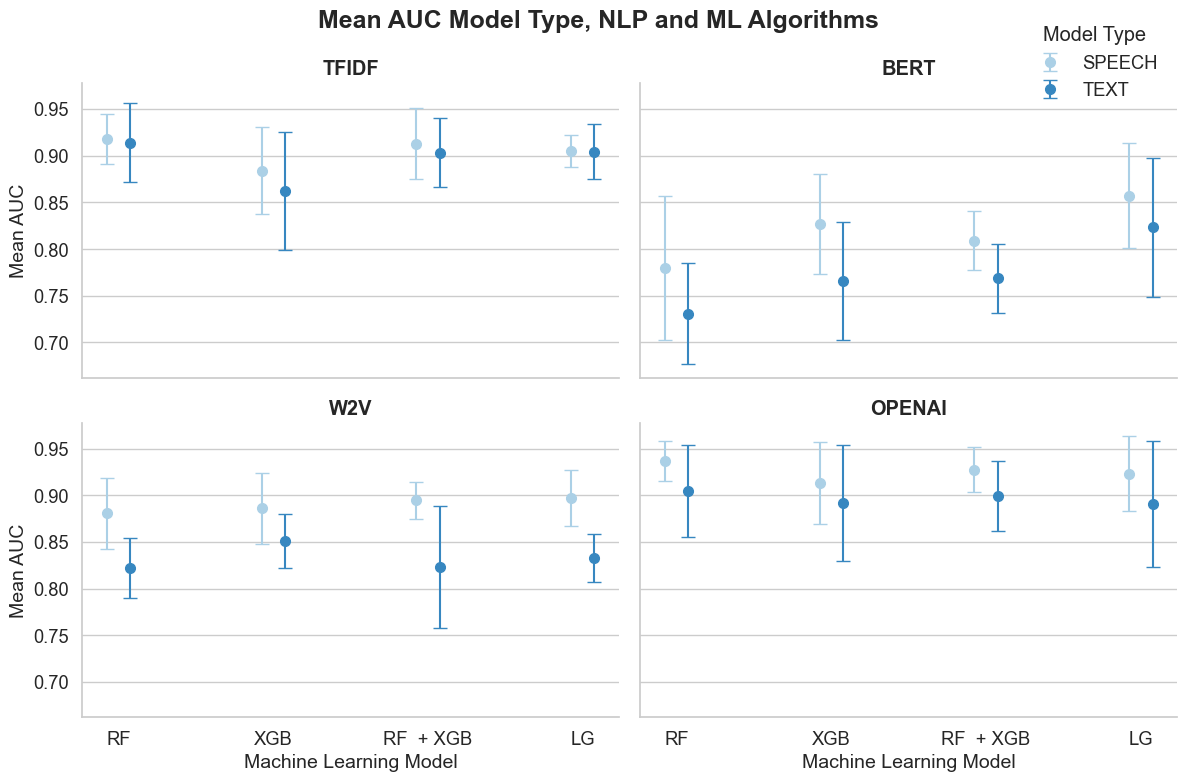

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(style="whitegrid", context="notebook", font_scale=1.2)

# Paleta
types = df['TYPE'].unique()
palette_vibrant = sns.color_palette("Blues", len(types))

# Orden y posiciones
ml_order = df['ML'].unique()
ml_pos = {name: i for i, name in enumerate(ml_order)}
num_types = len(types)
dodge_amount = 0.15

# Grilla
g = sns.FacetGrid(df, col="NLP", col_wrap=2, height=4, aspect=1.5, sharey=True)

# Para guardar handles y evitar duplicados
legend_items = {}

for ax, nlp in zip(g.axes.flatten(), df['NLP'].unique()):
    subset = df[df['NLP'] == nlp]
    for i, t in enumerate(types):
        sub = subset[subset["TYPE"] == t]
        for _, row in sub.iterrows():
            xpos = ml_pos[row["ML"]] + dodge_amount * (i - (num_types - 1) / 2)
            point = ax.errorbar(xpos, row["MEAN AUC CV"], yerr=row["STD AUC"],
                                fmt='o', capsize=5, color=palette_vibrant[i],
                                markersize=7, label=t)
            # Guardamos el primer handle de cada tipo
            if t not in legend_items:
                legend_items[t] = point

    ax.set_xticks(range(len(ml_order)))
    ax.set_xticklabels(ml_order, ha="center")
    ax.grid(True, axis='y')     # Solo líneas horizontales
    ax.grid(False, axis='x')    # Sin líneas verticales

# Etiquetas
g.set_axis_labels("Machine Learning Model", "Mean AUC", fontsize=14)
g.set_titles("{col_name}", fontsize=16, weight='bold')

# Leyenda única arriba a la derecha
g.fig.legend(legend_items.values(), legend_items.keys(),
             title="Model Type", loc='upper right',
             bbox_to_anchor=(0.98, 0.98), frameon=False)

# Título general
plt.subplots_adjust(top=0.88, bottom=0.2)
g.fig.suptitle("Mean AUC Model Type, NLP and ML Algorithms", fontsize=18, weight='bold')

plt.tight_layout()
plt.show()


In [72]:
df

,TYPE,NLP,ML,MEAN AUC CV,STD AUC,PARAMETERS,AUC TEST
0,SPEECH,TDIDF,RF,0.9180,0.0266,"{'model__max_depth': None, 'model__max_feature...",0.8960
1,SPEECH,BERT,RF,0.7798,0.0772,"{'model__max_depth': None, 'model__max_featur...",0.7967
2,SPEECH,W2V,RF,0.8806,0.0381,"{'model__max_depth': 10, 'model__max_features'...",0.8832
3,SPEECH,OPENAI,RF,0.9360,0.0214,"{'model__max_depth': None, 'model__max_featur...",0.8896
4,SPEECH,TDIDF,XGB,0.8838,0.0465,"{'model__learning_rate': 0.01, 'model__max_dep...",0.9156
5,SPEECH,BERT,XGB,0.8271,0.0534,"{'model__learning_rate': 0.2, 'model__max_dept...",0.8519
6,SPEECH,W2V,XGB,0.8859,0.0377,"{'model__learning_rate': 0.01, 'model__max_dep...",0.9076
7,SPEECH,OPENAI,XGB,0.9131,0.0438,"{'model__learning_rate': 0.01, 'model__max_dep...",0.8924
8,SPEECH,TDIDF,RF + XGB,0.9128,0.0382,same as rf and xgb,0.9164
9,SPEECH,BERT,RF + XGB,0.8092,0.0316,same as rf and xgb,0.8419
